In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')  # Alternatively, use pd.read_csv('path/to/titanic.csv')

# Display the first few rows
print(titanic.head())

# Basic dataset info
print(titanic.info())

# Check for missing values
print(titanic.isnull().sum())




   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [4]:
titanic.drop(columns=['deck', 'embark_town', 'alive'], inplace=True)

# Fill missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Check for duplicates
print(f"Duplicate rows: {titanic.duplicated().sum()}")

# Basic statistics
print(titanic.describe(include='all'))

Duplicate rows: 116
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  891.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.361582    0.523008    0.381594   
std       0.486592    0.836071   NaN   13.019697    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   22.000000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   35.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male alone  
count   

<ipython-input-4-0a6f56474f41>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
<ipython-input-4-0a6f56474f41>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

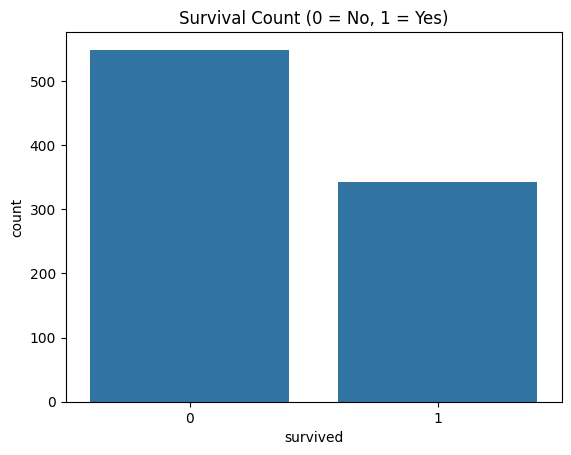

In [5]:
# Survival count
sns.countplot(x='survived', data=titanic)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()


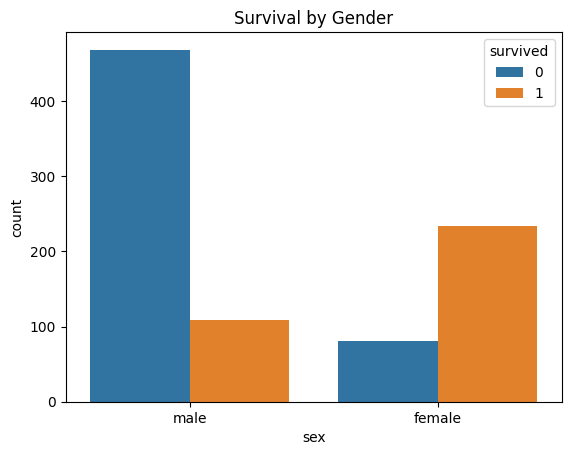

In [6]:
# Survival by gender
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Survival by Gender')
plt.show()

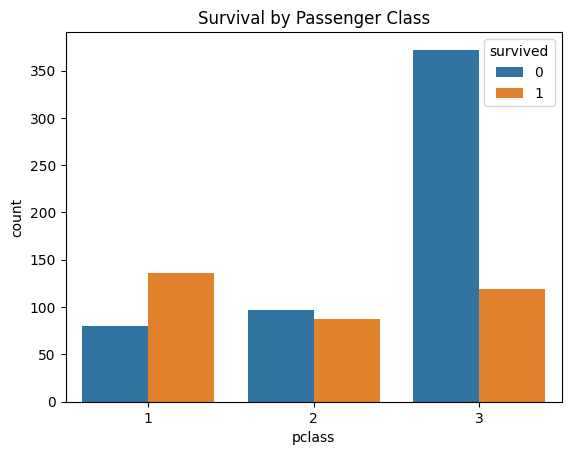

In [7]:
# Survival by class
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.show()

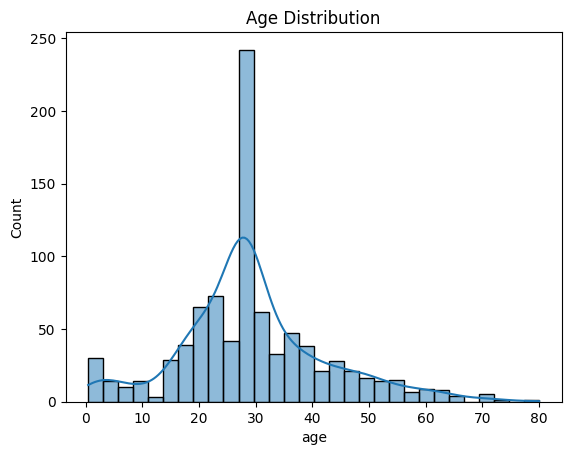

In [8]:
# Age distribution
sns.histplot(titanic['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

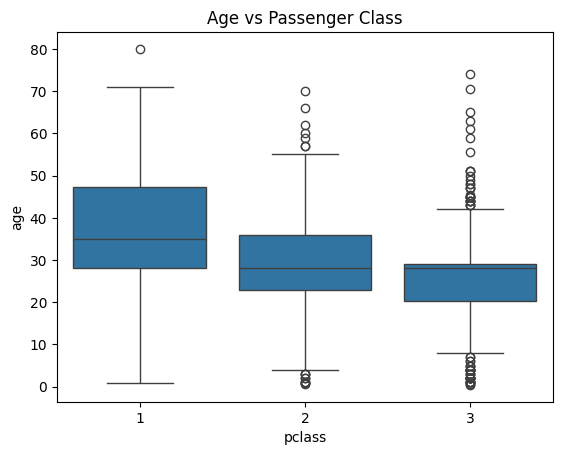

In [9]:
# Boxplot of age by class
sns.boxplot(x='pclass', y='age', data=titanic)
plt.title('Age vs Passenger Class')
plt.show()

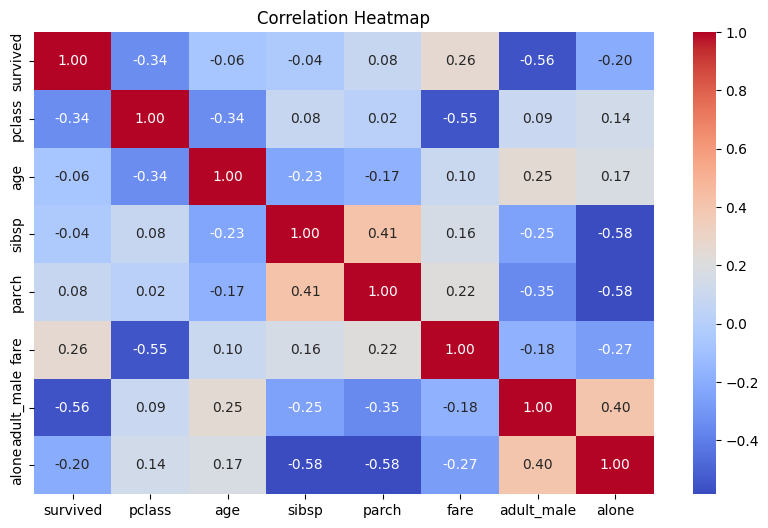

In [10]:

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Pivot table: survival rate by class and sex
pivot = titanic.pivot_table(index='sex', columns='pclass', values='survived', aggfunc='mean')
print(pivot)


pclass         1         2         3
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


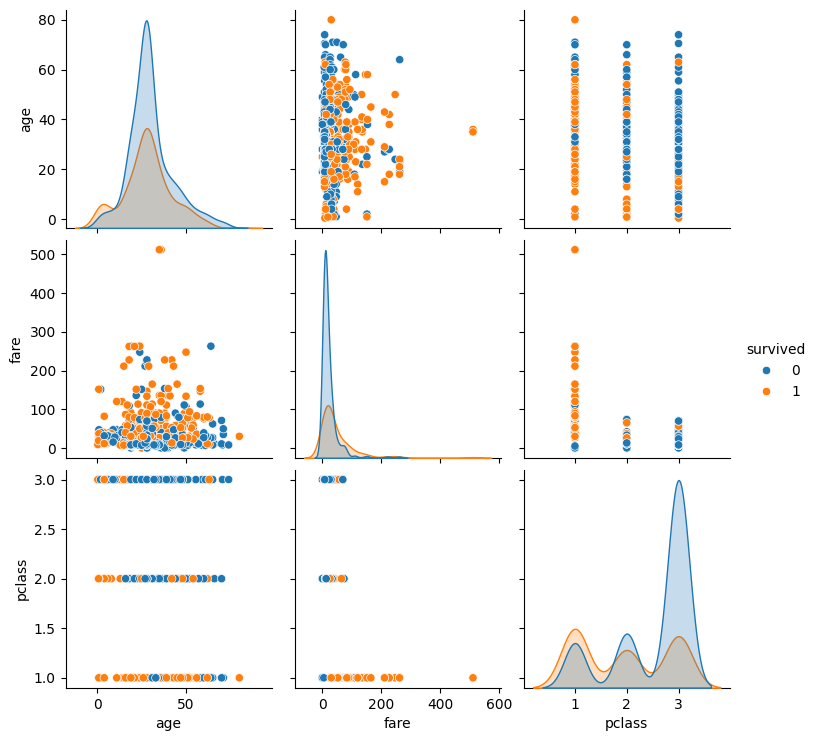

In [12]:
# Pairplot for numerical variables
sns.pairplot(titanic[['age', 'fare', 'pclass', 'survived']], hue='survived')
plt.show()
